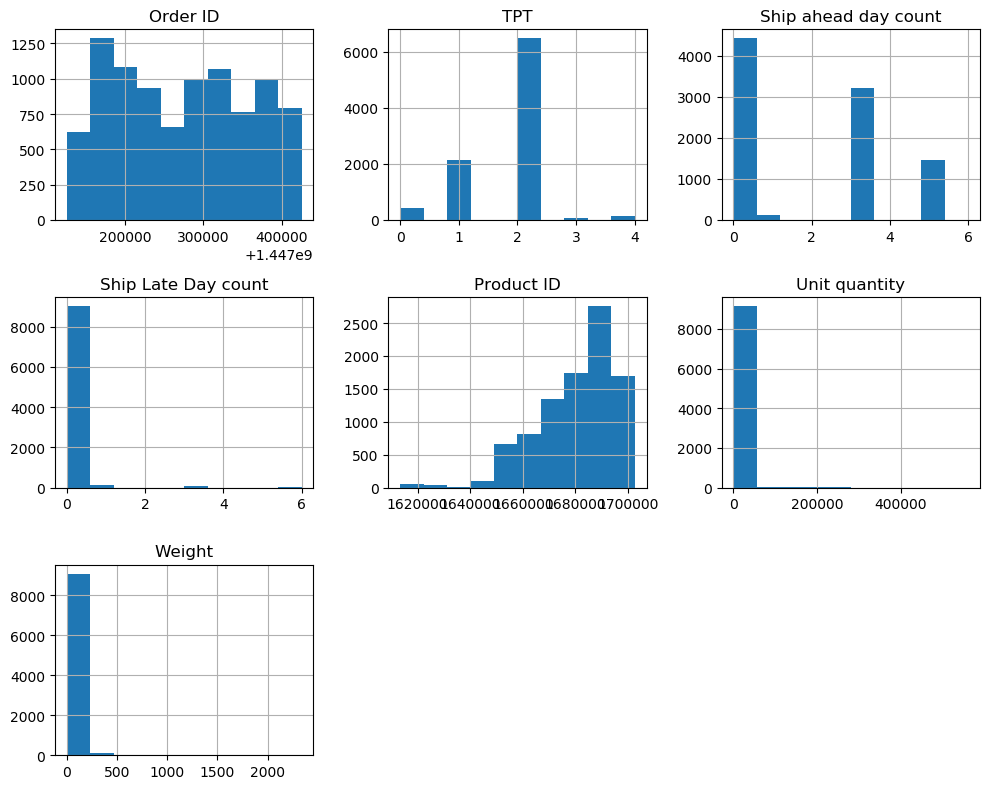

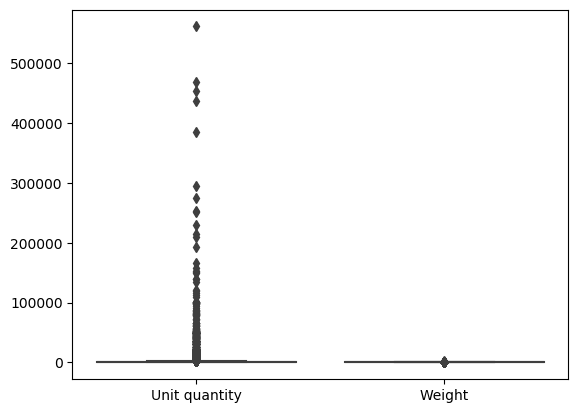

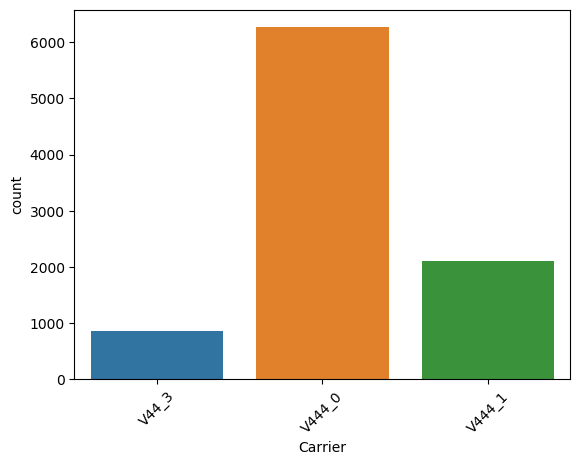

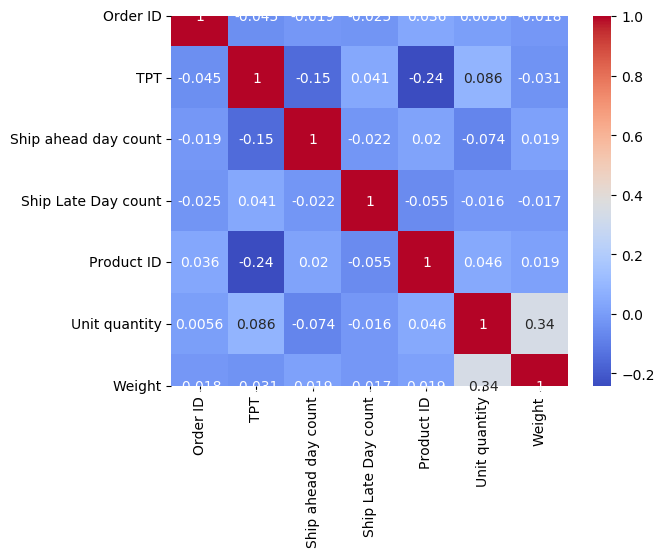

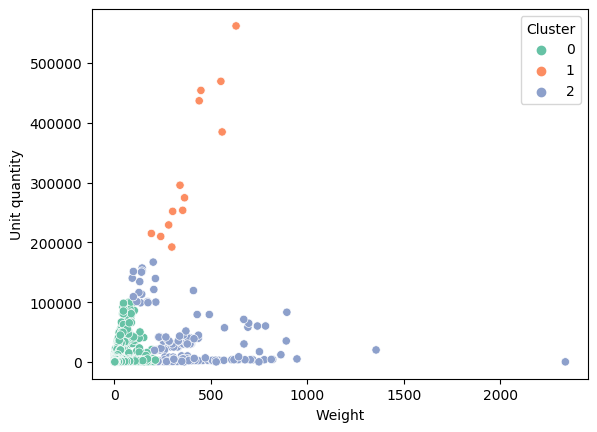

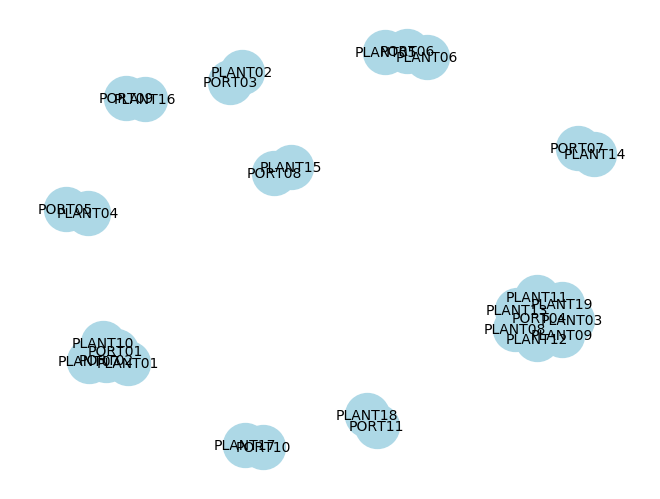

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import networkx as nx

# Load data from CSV files
order_list = pd.read_csv('preprocessed_OrderList.csv')
freight_rates = pd.read_csv('preprocessed_FreightRates.csv')
wh_costs = pd.read_csv('preprocessed_WhCosts.csv')
wh_capacities = pd.read_csv('preprocessed_WhCapacities.csv')
products_per_plant = pd.read_csv('preprocessed_ProductsPerPlant.csv')
vmi_customers = pd.read_csv('preprocessed_VmiCustomers.csv')
plant_ports = pd.read_csv('preprocessed_PlantPorts.csv')

# Exploratory Data Analysis (EDA)
# Summary statistics
order_list_summary = order_list.describe()

# Histograms
order_list.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Box plots
sns.boxplot(data=order_list[['Unit quantity', 'Weight']])
plt.show()

# Count plots
sns.countplot(x='Carrier', data=order_list)
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis
corr_matrix = order_list.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Cluster Analysis
# Standardize numerical variables
scaler = StandardScaler()
order_list_scaled = scaler.fit_transform(order_list[['Weight', 'Unit quantity']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(order_list_scaled)
order_list['Cluster'] = kmeans.labels_

# Visualize clusters
sns.scatterplot(data=order_list, x='Weight', y='Unit quantity', hue='Cluster', palette='Set2')
plt.xlabel('Weight')
plt.ylabel('Unit quantity')
plt.show()

# Network Analysis
# Create a network graph
G = nx.Graph()
for index, row in plant_ports.iterrows():
    G.add_edge(row['Plant Code'], row['Port'])

# Visualize the network graph
nx.draw(G, with_labels=True, node_size=1000, node_color='lightblue', font_size=10)
plt.show()
